In [1]:
from utils import *


In [2]:
# Variable to set for application

# Select the portfolio to be invested in
# Options are fidelity_index_focused_models, betterment, rick_ferris_core and vanguard_total_stock_etf
portfolio_selection = 'betterment'

# Select timing of contributions
# Options are monthly, annual, ml_model_1, ml_model_2
timing = 'monthly'



In [3]:
# Load pkl files and set dfs

# IRA contribution limits
path = f"./Resources/ira_contribution_limits.pkl"

pkl_file = open(Path(path), 'rb')
dataframe = pickle.load(pkl_file)
pkl_file.close()

ira_contr_limits = dataframe

# Portfolio
# Read in portfolio data from pkl file
path = f"./Resources/{portfolio_selection}.pkl"

pkl_file = open(Path(path), 'rb')
dataframe = pickle.load(pkl_file)
pkl_file.close()
         
# create portfolio allocation df for account setup and future rebalancing
selected_portfolio_weights = dataframe

# ML model predictions
path = './Resources/portfolio_returns_pred_df.pkl'
pkl_file = open(Path(path), 'rb')
dataframe = pickle.load(pkl_file)
pkl_file.close()

ml_model_1 = dataframe

ml_model_1.index = ml_model_1.index + BDay(1)
#ml_model_1
ml_model_1['Months_To_Invest'].values

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3], dtype=object)

In [4]:

# Transaction plan - annual, monthly, ML model 1, ML model 2
today = date.today()

# For annual
yearly_contr = pd.date_range(start='2013-01-01', end = today, freq='BAS')

# For monthly
monthly_contr = pd.date_range(start='2013-01-01', end = today, freq='BMS')

# library of timing options
investment_timing_idx = {
    'monthly': monthly_contr,
    'annual': yearly_contr,
    'ml_model_1': ml_model_1.index, 
    #'ml_model_2': ml_model_2.index, 
}

investment_data_idx = {
    'monthly': len(monthly_contr)*[1],
    'annual': len(yearly_contr)*[12],
    'ml_model_1': ml_model_1['Months_To_Invest'].values,
    #'ml_model_2': ml_model_2['Months_To_Invest'].values,
}

In [5]:
# Create initial df for investment dates
investment_dates = pd.DataFrame(
     index=investment_timing_idx[timing],
     data=investment_data_idx[timing],
     columns=['months_to_invest']
)

investment_dates.index = pd.to_datetime(investment_dates.index)
investment_dates

months_to_invest
2013-01-01                 1
2013-02-01                 1
2013-03-01                 1
2013-04-01                 1
2013-05-01                 1
...                      ...
2022-05-02                 1
2022-06-01                 1
2022-07-01                 1
2022-08-01                 1
2022-09-01                 1

[117 rows x 1 columns]

In [6]:
# Set up start dates

# Set the start date of the investment account
portfolio_investment_start_date = investment_dates.index[0]


# Set transaction range from portfolio start to today to include all business days
transaction_range = pd.date_range(
    start=pd.Timestamp(portfolio_investment_start_date), 
    end=today, 
    freq='B'
).tolist()


In [7]:
# This function sets up the new holding account for the IRA contribution amount to be held until contribution date(s) 
# This function also creates an investment account with a portfolio attached for investment and rebalancing

# Create a new holding account 
holding_account = 0

# variable to track holding account top ups
holding_acct_funded = None

# create new investment account with the selected portfolio funds as columns
investment_account = pd.DataFrame(columns=selected_portfolio_weights.columns.values)

debug_print(f'{portfolio_selection} has been attached to the new investment account.')
debug_print('The portfolio asset allocation is:')
debug_print(selected_portfolio_weights)
debug_print(f'The holding account balance is ${holding_account}.')

betterment has been attached to the new investment account.
The portfolio asset allocation is:
            VFIAX  VVIAX  VTMGX  VEMAX  VIMAX  VSMAX  VIPSX  VSBSX
2013-01-02     15     15     15      6      5      4     20     20
The holding account balance is $0.


In [8]:
# Create a dataframe of portfolio returns for the selected portfolio

portfolio_returns = portfolio_return(selected_portfolio_weights)
portfolio_returns

VFIAX     VVIAX     VTMGX     VEMAX     VIMAX     VSMAX  \
Date                                                                     
2009-11-24 -0.000489 -0.001068 -0.007073 -0.005268 -0.001542 -0.004171   
2009-11-25  0.004596  0.005348  0.015138  0.008826  0.008987  0.002285   
2009-11-27 -0.016938 -0.019149 -0.028947 -0.036745 -0.020598 -0.023556   
2009-11-30  0.003862  0.006508  0.002710  0.008780  0.004263  0.002335   
2009-12-01  0.012133  0.011854  0.027928  0.026411  0.015707  0.016693   
...              ...       ...       ...       ...       ...       ...   
2022-09-01  0.003169  0.004564 -0.014604 -0.006991 -0.004857 -0.009022   
2022-09-02 -0.010677 -0.008139 -0.003120 -0.006747 -0.006469 -0.006106   
2022-09-06 -0.004047 -0.003435 -0.006260 -0.008269 -0.003080 -0.006814   
2022-09-07  0.018382  0.015128  0.007087  0.005658  0.023115  0.023282   
2022-09-08  0.006731  0.007923  0.003909 -0.002369  0.009595  0.010222   

               VIPSX     VSBSX  
Date                            
2009-11-24  0.000772  0.000500  
2009-11-25  0.003858  0.000500  
2009-11-27  0.001537  0.000499  
2009-11-30  0.001535  0.000499  
2009-12-01 -0.001533  0.000000  
...              ...       ...  
2022-09-01 -0.008494 -0.001026  
2022-09-02  0.006231  0.002053  
2022-09-06 -0.008514 -0.001537  
2022-09-07  0.003903  0.001026  
2022-09-08 -0.006221 -0.001025  

[3219 rows x 8 columns]

In [9]:
# Adjust the invested balance by the fund return until the next contribution

# For each day in range, multiply by fund return
# loop of returns 

#debug_print(f'The next transaction date at the beginning of the function is {next_transaction}')

for date in transaction_range:
    debug_print(f'Date: {date}')
       
    # ignore any dates before investment start date
    if date < portfolio_investment_start_date:
        continue
    
    try:
        # Look up whether investing and record data points for investment
        if investment_dates.loc[date]['months_to_invest'] > 0:
            
            # how much are we investing
            months_to_invest = investment_dates.loc[date]['months_to_invest']
            
            debug_print(f"months to invest: {months_to_invest}")

            # monthly amount for this year
            # Locate the contribution limit for the contribution date
            year = str(date.year)
            ira_contribution_limit = ira_contr_limits.loc[year]['ira_limit'][0]

            debug_print(f'The IRA contribution limit for {year} is {ira_contribution_limit}.')

            # Amount of this transaction                     
            trans_amt = months_to_invest * ira_contribution_limit/12

            debug_print(f'We are investing ${trans_amt}.')

            # Credit holding account for the year
            
            debug_print(f'The holding account balance is: ${holding_account}')
            debug_print(f'The holding account was last funded: {holding_acct_funded}')

            # If the holding account has never been funded, credit
            if holding_acct_funded == None or holding_acct_funded.year < float(year):
                holding_account = credit_holding_acct(holding_account, ira_contribution_limit)
                
                debug_print(f'The holding account has been funded: ${holding_account}')

                holding_acct_funded = date

                debug_print(f'The holding account was last funded: {holding_acct_funded}')      
       
            # Validate investment amount and update holding account balance 

            # If the holding account is zero:
            if holding_account <= 0:
                investment_account.loc[date] = investment_account.iloc[-1] * (1 + portfolio_returns.loc[date])
                print("The holding account has zero funds. The portfolio return has been added to the previous day's balance.")

            # If the holding account has enough funds:
            elif trans_amt <= holding_account:
                # first transaction
                if date == portfolio_investment_start_date:

                    investment_account.loc[date] = trans_amt * (selected_portfolio_weights.iloc[0].values /100)

                    debug_print('The first contribution has been invested.')
                    debug_print(investment_account)
                
                # Subsequent transactions add to the previous days balance
                else: 
                    # Check for any skipped contributions and add all up to this month
                    trans_amt = max(trans_amt, max(holding_account - ((12 - date.month) * ira_contribution_limit/12), 0))
                    
                    debug_print(f'We are now investing ${trans_amt}.')
                    
                    new_account_value = investment_account.iloc[-1].sum() + trans_amt
                    investment_account.loc[date] = new_account_value * selected_portfolio_weights.iloc[0].values /100
                    
                    debug_print('The contribution has been invested.')
                    debug_print(investment_account)
                    
                # update holding account balance
                holding_account = debit_holding_acct(holding_account, trans_amt)
                debug_print(f'The holding account balance is: ${holding_account}')

            # If the holding account has some funds, but not enough for the full transaction:         
            else: 
                new_account_value = investment_account.iloc[-1].sum() + holding_account
                investment_account.loc[date] = new_account_value * selected_portfolio_weights.iloc[0].values /100

                # update holding account balance
                trans_amt = holding_account
                holding_account = debit_holding_acct(holding_account, trans_amt)
                print('There were insufficient funds in the holding account to fully complete the transaction.')
                print(f'{holding_account} has been added to the investment portfolio.')
                debug_print(f'The holding account balance is: ${holding_account}')       
    
    # Handle portfolio return adjustments for dates without a contribution
    except: 
        try:
            investment_account.loc[date] = investment_account.iloc[-1] * (1 + portfolio_returns.loc[date])
            debug_print('The account increased by portfolio return.')
            
        except:
            # handle holidays
            investment_account.loc[date] = investment_account.iloc[-1]
            debug_print('The account balance rolled over from previous day.')

debug_print(f'The investment account balance is now ${investment_account.iloc[-1].sum()} and the holding account is ${holding_account: .2f}.')

Date: 2013-01-01 00:00:00
months to invest: 1
The IRA contribution limit for 2013 is 5500.
We are investing $458.3333333333333.
The holding account balance is: $0
The holding account was last funded: None
The holding account has been funded: $5500
The holding account was last funded: 2013-01-01 00:00:00
The first contribution has been invested.
            VFIAX  VVIAX  VTMGX  VEMAX      VIMAX      VSMAX      VIPSX  \
2013-01-01  68.75  68.75  68.75   27.5  22.916667  18.333333  91.666667   

                VSBSX  
2013-01-01  91.666667  
The holding account balance is: $5041.666666666667
Date: 2013-01-02 00:00:00
The account increased by portfolio return.
Date: 2013-01-03 00:00:00
The account increased by portfolio return.
Date: 2013-01-04 00:00:00
The account increased by portfolio return.
Date: 2013-01-07 00:00:00
The account increased by portfolio return.
Date: 2013-01-08 00:00:00
The account increased by portfolio return.
Date: 2013-01-09 00:00:00
The account increased by portfol

In [10]:
display(investment_account.head(3))
display(investment_account.loc['2012-12-31':'2013-01-03'])
display(investment_account.tail())

VFIAX      VVIAX      VTMGX      VEMAX      VIMAX      VSMAX  \
2013-01-01  68.750000  68.750000  68.750000  27.500000  22.916667  18.333333   
2013-01-02  70.513631  70.459005  70.093246  28.038188  23.444804  18.825250   
2013-01-03  70.367099  70.399038  69.421623  28.015764  23.467277  18.829981   

                VIPSX      VSBSX  
2013-01-01  91.666667  91.666667  
2013-01-02  91.288143  91.666667  
2013-01-03  90.720351  91.666667

VFIAX      VVIAX      VTMGX      VEMAX      VIMAX      VSMAX  \
2013-01-01  68.750000  68.750000  68.750000  27.500000  22.916667  18.333333   
2013-01-02  70.513631  70.459005  70.093246  28.038188  23.444804  18.825250   
2013-01-03  70.367099  70.399038  69.421623  28.015764  23.467277  18.829981   

                VIPSX      VSBSX  
2013-01-01  91.666667  91.666667  
2013-01-02  91.288143  91.666667  
2013-01-03  90.720351  91.666667

VFIAX        VVIAX       VTMGX        VEMAX        VIMAX  \
2022-09-09  9166.52663  9177.151361  9088.25194  3587.049131  3094.533368   
2022-09-12  9166.52663  9177.151361  9088.25194  3587.049131  3094.533368   
2022-09-13  9166.52663  9177.151361  9088.25194  3587.049131  3094.533368   
2022-09-14  9166.52663  9177.151361  9088.25194  3587.049131  3094.533368   
2022-09-15  9166.52663  9177.151361  9088.25194  3587.049131  3094.533368   

                  VSMAX         VIPSX         VSBSX  
2022-09-09  2469.191073  12042.257132  12105.004969  
2022-09-12  2469.191073  12042.257132  12105.004969  
2022-09-13  2469.191073  12042.257132  12105.004969  
2022-09-14  2469.191073  12042.257132  12105.004969  
2022-09-15  2469.191073  12042.257132  12105.004969

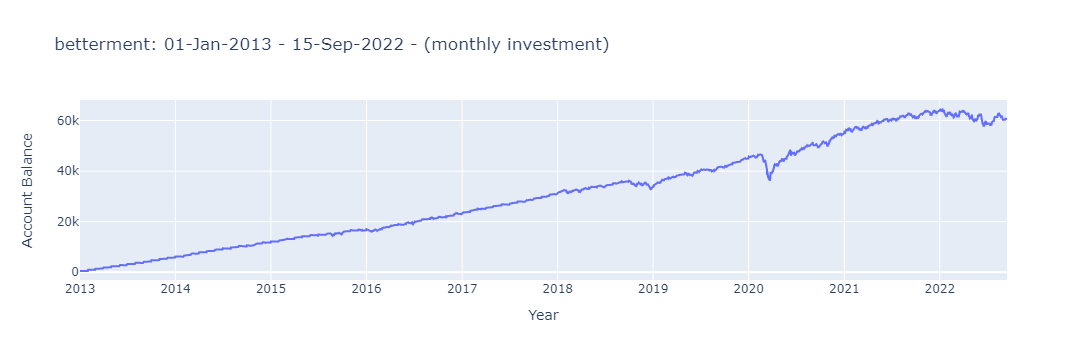

In [11]:
x = investment_account.index
y = investment_account.sum(axis=1)

fig = go.Figure(data=go.Scatter(x=x, y=y))

fig.update_layout(
    title=f'{portfolio_selection}: {portfolio_investment_start_date:%d-%b-%Y} - {today:%d-%b-%Y} - ({timing} investment)',
    xaxis_title="Year",
    yaxis_title="Account Balance",
    #legend_title="Legend Title",
    #font=dict(
     #   family="Courier New, monospace",
     #   size=18,
     #   color="RebeccaPurple"
    )

fig.show()

In [12]:
save_pickle(investment_account, f'./Resources/{portfolio_selection}_{timing}.pkl')

---- save_pickle()


In [13]:
save_image(fig, f'./images/{portfolio_selection}_{timing}.png')

In [14]:
# Overlay

# Fidelity Charts
path = f"./Resources/fidelity_index_focused_models_ml_model_1.pkl"

pkl_file = open(Path(path), 'rb')
dataframe = pickle.load(pkl_file)
pkl_file.close()

fid_model_1 = dataframe

path = f"./Resources/fidelity_index_focused_models_annual.pkl"

pkl_file = open(Path(path), 'rb')
dataframe = pickle.load(pkl_file)
pkl_file.close()

fid_annual = dataframe

path = f"./Resources/fidelity_index_focused_models_monthly.pkl"

pkl_file = open(Path(path), 'rb')
dataframe = pickle.load(pkl_file)
pkl_file.close()

fid_monthly = dataframe

# Betterment Charts
path = f"./Resources/betterment_ml_model_1.pkl"

pkl_file = open(Path(path), 'rb')
dataframe = pickle.load(pkl_file)
pkl_file.close()

betterment_model_1 = dataframe

path = f"./Resources/betterment_annual.pkl"

pkl_file = open(Path(path), 'rb')
dataframe = pickle.load(pkl_file)
pkl_file.close()

betterment_annual = dataframe

path = f"./Resources/betterment_monthly.pkl"

pkl_file = open(Path(path), 'rb')
dataframe = pickle.load(pkl_file)
pkl_file.close()

betterment_monthly = dataframe

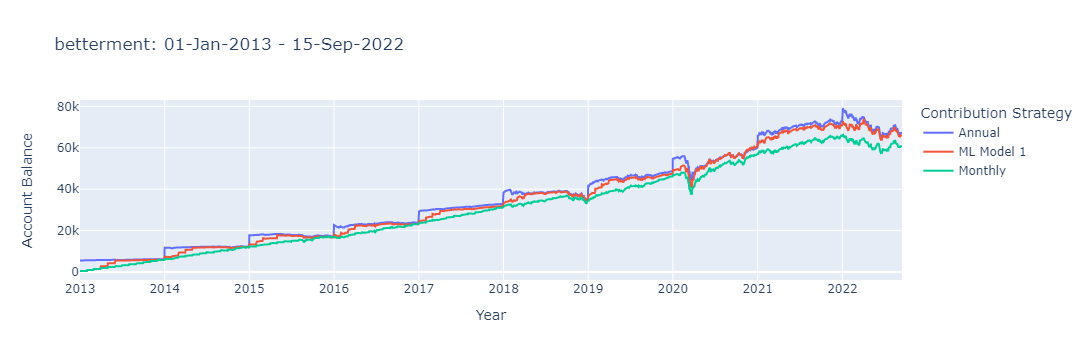

In [15]:
# Plot

plot_portfolio = 'Fidelity'

x = {
    'Fidelity':[fid_monthly.index, fid_model_1.index, fid_annual.index],
    'Betterment':[betterment_monthly.index, betterment_model_1.index, betterment_annual.index]
}

y = {
    'Fidelity':[fid_monthly.sum(axis=1), fid_model_1.sum(axis=1), fid_annual.sum(axis=1)],
    'Betterment':[betterment_monthly.sum(axis=1), betterment_model_1.sum(axis=1), betterment_annual.sum(axis=1)]
}


fig = go.Figure()

fig.add_scatter(x=x[plot_portfolio][2], y=y[plot_portfolio][2].values, mode='lines', name='Annual')

fig.add_scatter(x=x[plot_portfolio][1], y=y[plot_portfolio][1].values, mode='lines', name='ML Model 1')

fig.add_scatter(x=x[plot_portfolio][0], y=y[plot_portfolio][0].values, mode='lines', name='Monthly')

fig.update_layout(
    title=f'{portfolio_selection}: {portfolio_investment_start_date:%d-%b-%Y} - {today:%d-%b-%Y}',
    xaxis_title="Year",
    yaxis_title="Account Balance",
    legend_title="Contribution Strategy",
    #font=dict(
     #   family="Courier New, monospace",
     #   size=18,
     #   color="RebeccaPurple"
    )

fig.show()

In [16]:
save_image(fig, f'./images/{portfolio_selection}_overlay.png')